In [2]:
import pandas, numpy
from novelty_experiment_runner_cartpole import NoveltyExperimentRunnerCartpole
from os import path
import settings
import constants
import seaborn as sns
import matplotlib.pyplot as plt

importing local settings
import error!!!!


Novelty: {gravity: 12}

In [4]:
results_file_2 = open(path.join(settings.ROOT_PATH, "data", "cartpole", "test", "planner_experiment_test.csv"), "r")
dataframe2 = NoveltyExperimentRunnerCartpole.categorize_examples_for_novelty_detection(pandas.read_csv(results_file_2))
print(dataframe2)

    Unnamed: 0  trial_num  episode_num                     type  \
0            0          0            0  non-novelty-performance   
1            0          0            1  non-novelty-performance   
2            0          0            2  non-novelty-performance   
3            0          0            3  non-novelty-performance   
4            0          0            4  non-novelty-performance   
5            0          0            5          unknown-novelty   
6            0          0            6          unknown-novelty   
7            0          0            7          unknown-novelty   
8            0          0            8          unknown-novelty   
9            0          0            9          unknown-novelty   
10           0          0            5            known-novelty   
11           0          0            6            known-novelty   
12           0          0            7            known-novelty   
13           0          0            8            known-novelt

In [5]:
trials,cdt = NoveltyExperimentRunnerCartpole.get_trials_summary(dataframe2)
print(trials)
print(cdt)

                      FN  FP  TN  TP  performance  is_CDT
novelty_id trial_num                                     
0.0        0           0   0   5  10     0.868333    True
           1           1   1   4   9     0.880333   False
           2           0   5   0  10     0.951667   False
                      FN  FP  TN  TP  performance  is_CDT
novelty_id trial_num                                     
0.0        0           0   0   5  10     0.868333    True


In [8]:
M1, M2, M21 = NoveltyExperimentRunnerCartpole.get_program_metrics(cdt, trials)
print(M1, M2, M21)

0.0 0.3333333333333333 0.3333333333333333


In [9]:
def plot_experiment_results(df, novelty_episode_number):
    plt.figure(figsize=(16,9))
    #g = sns.FacetGrid(df, row='env_config', hue='type')
    #g.map(sns.lineplot, 'episode_num', 'performance')
    sns.lineplot(data=df, y='performance', x='episode_num', hue='type', ci=95)
    plt.axvline(x=novelty_episode_number, color='red')
    plt.title("Experiment results", fontsize=20)
    plt.xlabel("episodes", fontsize=15)
    plt.ylabel("performance", fontsize=15)

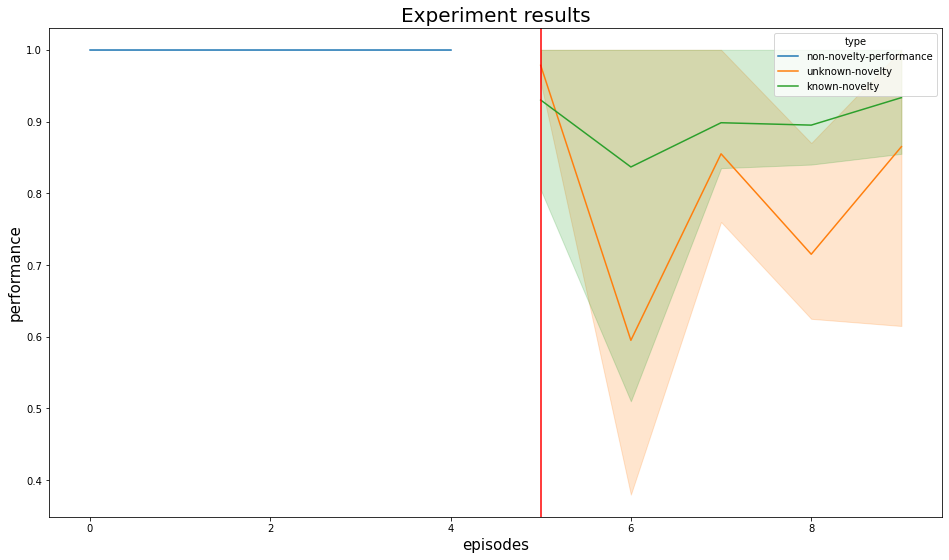

In [10]:
plot_experiment_results(dataframe2, 5)